#V/X接线中性点悬空，首端加一个AT变压器

In [2]:
import numpy as np
from scipy import linalg
import Ipynb_importer
import new_topo as tp
import conductors_calculation as cc
import calculation as ca
class ChainNetwork_implement(ca.ChainNetwork):
    def __init__(self,name="",h=1,delta_length=1,m=6,topology=tp.Topology(name="AT_System"),):
        super().__init__(name,h,delta_length,m,topology)
Z_short_circuit = []
V_change = []
I_change = []
for i in range(1,61):
    chen1 = ChainNetwork_implement(h=1, m=6, delta_length=0.5)
    chen1.set_z_y()
    chen1.add_y_AT()
    YY1 = chen1.add_y_source()     #加入三绕组电源变压器绕组
    
    chen1.add_y()
    R1 = chen1.source()
    #chen1.locomotives()
    Q1 = chen1.construct_M()
    
    chen1.y[i,0,0] = chen1.y[i,0,0] + 10**8 
    chen1.y[i,2,2] = chen1.y[i,2,2] + 10**8  
    chen1.y[i,2,0] = chen1.y[i,2,0] - 10**8
    chen1.y[i,0,2] = chen1.y[i,0,2] - 10**8

    UU1,II1 = chen1.solution()
    V_change.append(UU1[0][0]-UU1[1][0])
    I_change.append(II1[0][0]+II1[3][0])
print('V_change[0]和I_change[0]')
print(V_change[0])
print(abs(I_change[0]))
print('II1矩阵')
print(II1)
print('+++++++++++++++++结束++++++++++++++')
print('UU1矩阵')
print(UU1)
print('***********************************')
print(len(V_change))
print(len(I_change))
for i in range(0,60):
    Z_short_circuit.append(abs(V_change[i]/I_change[i]))
print('短路阻抗')
print(Z_short_circuit)
print('电压')
print(V_change)
print('电流')
print(I_change)

(0.146453652882+0.0156835643512j)
(0.158970408512+0.0156597453099j)
(0.166356785217+0.0155464452258j)
(4.9427730397+0.0172789898818j)
(4.9427730397+0.0172789898818j)
(0.257172053633+0.0156411023741j)
(0.280588688557+0.0156914529102j)
(0.146453652882+0.0156835643512j)
(0.158970408512+0.0156597453099j)
(0.166356785217+0.0155464452258j)
(4.9427730397+0.0172789898818j)
(4.9427730397+0.0172789898818j)
(0.257172053633+0.0156411023741j)
(0.280588688557+0.0156914529102j)
(61, 6, 6)
(0.146453652882+0.0156835643512j)
(0.158970408512+0.0156597453099j)
(0.166356785217+0.0155464452258j)
(4.9427730397+0.0172789898818j)
(4.9427730397+0.0172789898818j)
(0.257172053633+0.0156411023741j)
(0.280588688557+0.0156914529102j)
(0.146453652882+0.0156835643512j)
(0.158970408512+0.0156597453099j)
(0.166356785217+0.0155464452258j)
(4.9427730397+0.0172789898818j)
(4.9427730397+0.0172789898818j)
(0.257172053633+0.0156411023741j)
(0.280588688557+0.0156914529102j)
(61, 6, 6)
(0.146453652882+0.0156835643512j)
(0.15897

calculation.ipynb:237: ComplexWarning: Casting complex values to real discards the imaginary part
  "   -8.33298770e-02 +12.21291293j  -9.49079610e-02 +12.2230136j\n",


(0.146453652882+0.0156835643512j)
(0.158970408512+0.0156597453099j)
(0.166356785217+0.0155464452258j)
(4.9427730397+0.0172789898818j)
(4.9427730397+0.0172789898818j)
(0.257172053633+0.0156411023741j)
(0.280588688557+0.0156914529102j)
(0.146453652882+0.0156835643512j)
(0.158970408512+0.0156597453099j)
(0.166356785217+0.0155464452258j)
(4.9427730397+0.0172789898818j)
(4.9427730397+0.0172789898818j)
(0.257172053633+0.0156411023741j)
(0.280588688557+0.0156914529102j)
(61, 6, 6)
(0.146453652882+0.0156835643512j)
(0.158970408512+0.0156597453099j)
(0.166356785217+0.0155464452258j)
(4.9427730397+0.0172789898818j)
(4.9427730397+0.0172789898818j)
(0.257172053633+0.0156411023741j)
(0.280588688557+0.0156914529102j)
(0.146453652882+0.0156835643512j)
(0.158970408512+0.0156597453099j)
(0.166356785217+0.0155464452258j)
(4.9427730397+0.0172789898818j)
(4.9427730397+0.0172789898818j)
(0.257172053633+0.0156411023741j)
(0.280588688557+0.0156914529102j)
(61, 6, 6)
(0.146453652882+0.0156835643512j)
(0.15897

60
0.5


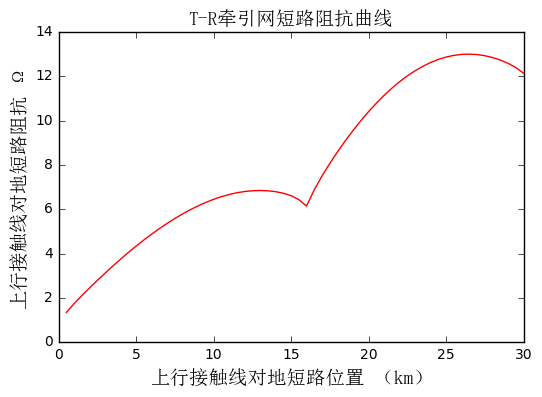

In [3]:
#接触线对地短路阻抗-距离曲线
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
y = Z_short_circuit
print(len(y))
print(chen1.delta_length)
x = []
#for i in range(0,II1.shape[1],1):
for i in range(1,61):
    x.append(i*chen1.delta_length)
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) 
plt.xlabel('上行接触线对地短路位置 （km）',fontproperties=font_set)
plt.ylabel('上行接触线对地短路阻抗 Ω',fontproperties=font_set)
plt.title('T-R牵引网短路阻抗曲线',fontproperties=font_set)
plt.rcParams['figure.figsize']=(8.0,4.0)
plt.rcParams['figure.figsize']=(8.0,4.0)
plt.plot(x,y,color='red')
plt.show()

60
0.5


H:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


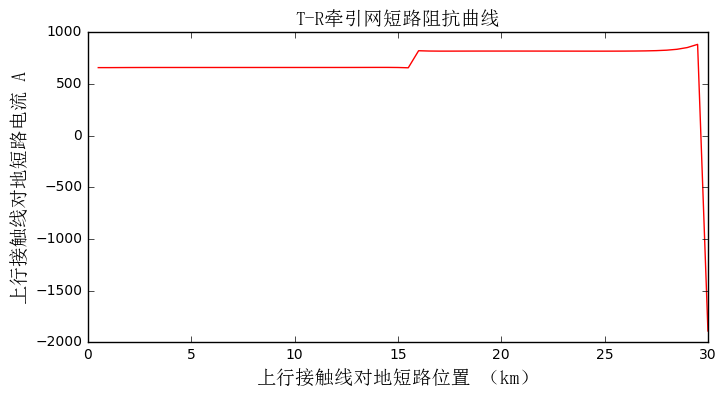

In [5]:
#接触线对地短路电流-距离曲线
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
#y = I_change
y=[]
for i in range (1,61):
    y.append(II1[0][i])
print(len(y))
print(chen1.delta_length)
x = []
#for i in range(0,II1.shape[1],1):
for i in range(1,61):
    x.append(i*chen1.delta_length)
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) 
plt.xlabel('上行接触线对地短路位置 （km）',fontproperties=font_set)
plt.ylabel('上行接触线对地短路电流 A',fontproperties=font_set)
plt.title('T-R牵引网短路阻抗曲线',fontproperties=font_set)
plt.rcParams['figure.figsize']=(8.0,4.0)
plt.rcParams['figure.figsize']=(8.0,4.0)
plt.plot(x,y,color='red')
plt.show()